# Preparing Time Series from Wide-Form Data

## Task

### Part 1

- First, you will prepare the dataset for time series analysis:
  - Load in the Zillow Home Value Index dataframe.
   - Note: it is a large file and may take a minute to load.
- Filter the 4 largest cities into a new dataframe.
  - Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
   - Therefore the 4 largest cities would have rank values of [0,1,2,3]
- Melt the data to long-form and prepare it for time series analysis.
 - Convert the melted dates into datetime datatype.
 - Make the datetime column the index.
- Resample the dataframe as monthly frequency, grouped by City.



---

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np

import datetime
today_datetime = datetime.datetime.today()

fmt = '%Y-%m-%d'
today_datetime.strftime(fmt)

'2023-10-04'

In [33]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
df = pd.read_csv(url)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


- Filter the 4 largest cities into a new dataframe.


In [34]:
df_new = df.loc[(df['SizeRank'][0:4])]
df_new

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [35]:
id_vars = df_new.columns[:8]
id_vars

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'],
      dtype='object')

- Convert the melted dates into datetime datatype. 

In [36]:
melted = pd.melt(df_new, id_vars, var_name ='Date', value_name='Value')
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [37]:
melted['Date'] = pd.to_datetime(melted['Date'],format=fmt)
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   Value       1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


- Make the datetime column the index.

In [38]:
melted = melted.set_index('Date')
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [39]:
melted.index

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-02-29', '2000-02-29', '2000-02-29', '2000-02-29',
               '2000-03-31', '2000-03-31',
               ...
               '2022-07-31', '2022-07-31', '2022-08-31', '2022-08-31',
               '2022-08-31', '2022-08-31', '2022-09-30', '2022-09-30',
               '2022-09-30', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

- Resample the dataframe as monthly frequency, grouped by City.

In [40]:
df_re = melted.groupby('RegionType').resample("M").last()['Value']
df_re

RegionType  Date      
city        2000-01-31    166139.0
            2000-02-29    166536.0
            2000-03-31    167368.0
            2000-04-30    168826.0
            2000-05-31    170499.0
                            ...   
            2022-05-31    312487.0
            2022-06-30    314663.0
            2022-07-31    315910.0
            2022-08-31    315587.0
            2022-09-30    315429.0
Name: Value, Length: 273, dtype: float64

In [41]:
type(df_re)

pandas.core.series.Series

In [42]:
df_re.index

MultiIndex([('city', '2000-01-31'),
            ('city', '2000-02-29'),
            ('city', '2000-03-31'),
            ('city', '2000-04-30'),
            ('city', '2000-05-31'),
            ('city', '2000-06-30'),
            ('city', '2000-07-31'),
            ('city', '2000-08-31'),
            ('city', '2000-09-30'),
            ('city', '2000-10-31'),
            ...
            ('city', '2021-12-31'),
            ('city', '2022-01-31'),
            ('city', '2022-02-28'),
            ('city', '2022-03-31'),
            ('city', '2022-04-30'),
            ('city', '2022-05-31'),
            ('city', '2022-06-30'),
            ('city', '2022-07-31'),
            ('city', '2022-08-31'),
            ('city', '2022-09-30')],
           names=['RegionType', 'Date'], length=273)

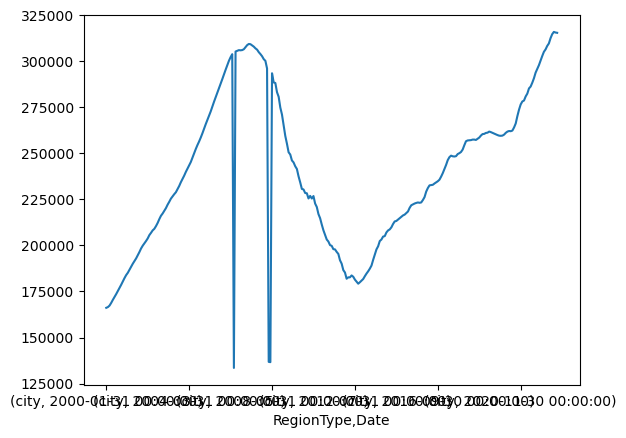

In [43]:
df_re.plot();

In [44]:
df_re

RegionType  Date      
city        2000-01-31    166139.0
            2000-02-29    166536.0
            2000-03-31    167368.0
            2000-04-30    168826.0
            2000-05-31    170499.0
                            ...   
            2022-05-31    312487.0
            2022-06-30    314663.0
            2022-07-31    315910.0
            2022-08-31    315587.0
            2022-09-30    315429.0
Name: Value, Length: 273, dtype: float64

### Part 2

- Once you've prepared the dataframe with the time series data for the 4 largest cities:
  - Plot the home values for all 4 cities. (Hint: use unstack)
   - Make sure to add a title and axis labels.
   - Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
     - Hint: use the FuncFormatter from matplotlib.

- Answer the following 2 questions using pandas:
  
 - 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
   - Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex. 

 - 2) How much did the home values change from November 2008 to December 2008 (in dollars)?
   - Hint: you can use .diff() to calculate the change in values

In [45]:
df_unstacked = df_re.unstack(0)
df_unstacked

RegionType,city
Date,
2000-01-31,166139.0
2000-02-29,166536.0
2000-03-31,167368.0
2000-04-30,168826.0
2000-05-31,170499.0
...,...
2022-05-31,312487.0
2022-06-30,314663.0
2022-07-31,315910.0


In [46]:
def thousands(x,pos):
    new_x = x/1_000
    return f"{new_x:,.0f}K"

fmt_thous = mticks.FuncFormatter(thousands)

In [47]:
loc_major_yr = mdates.YearLocator()
fmt_major_yr = mdates.DateFormatter("%Y")


loc_minor_3m = mdates.MonthLocator(interval=3)
fmt_minor_3m = mdates.DateFormatter("%b")

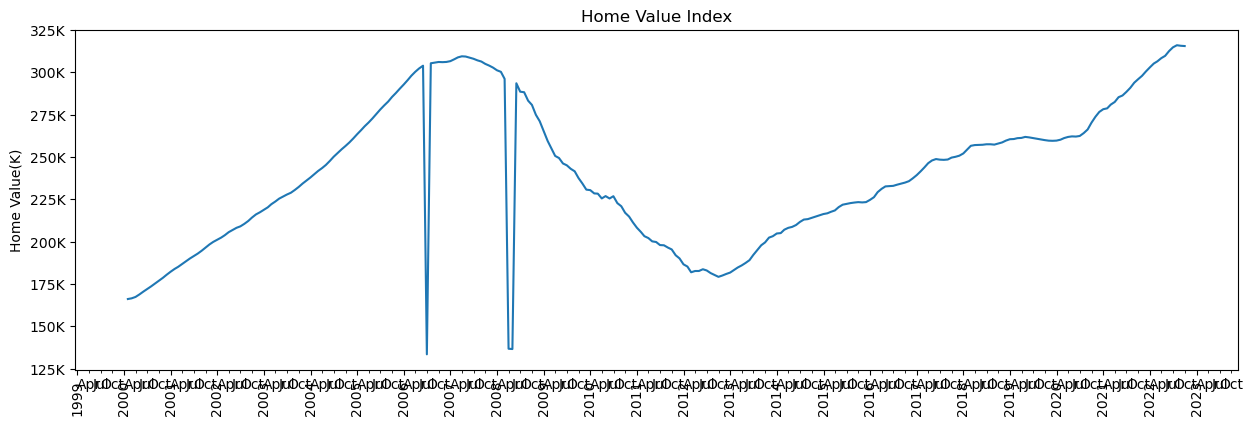

In [48]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df_unstacked)

ax.set(ylabel="Home Value(K)",title= 'Home Value Index')

ax.yaxis.set_major_formatter(fmt_thous)

ax.xaxis.set_major_locator(loc_major_yr)
ax.xaxis.set_major_formatter(fmt_major_yr)

ax.xaxis.set_minor_locator(loc_minor_3m)
ax.xaxis.set_minor_formatter(fmt_minor_3m)

fig = ax.get_figure()
fig.autofmt_xdate(which='major', rotation=90,ha='center')

---

- 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
  - Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex. 

In [49]:
city = ['Chicago','New York', 'Houston','Los Angeles']


In [50]:
df_re = melted.groupby('RegionName').resample("M").max()['Value']
df_re

RegionName  Date      
Chicago     2000-01-31    166139.0
            2000-02-29    166536.0
            2000-03-31    167368.0
            2000-04-30    168826.0
            2000-05-31    170499.0
                            ...   
New York    2022-05-31    768797.0
            2022-06-30    773944.0
            2022-07-31    777692.0
            2022-08-31    779960.0
            2022-09-30    781622.0
Name: Value, Length: 1092, dtype: float64

In [51]:
city = ['Chicago','New York', 'Houston','Los Angeles']

plot_df = df_re.loc[city].copy()
plot_df

RegionName   Date      
Chicago      2000-01-31    166139.0
             2000-02-29    166536.0
             2000-03-31    167368.0
             2000-04-30    168826.0
             2000-05-31    170499.0
                             ...   
Los Angeles  2022-05-31    990391.0
             2022-06-30    992337.0
             2022-07-31    992630.0
             2022-08-31    978196.0
             2022-09-30    966595.0
Name: Value, Length: 1092, dtype: float64

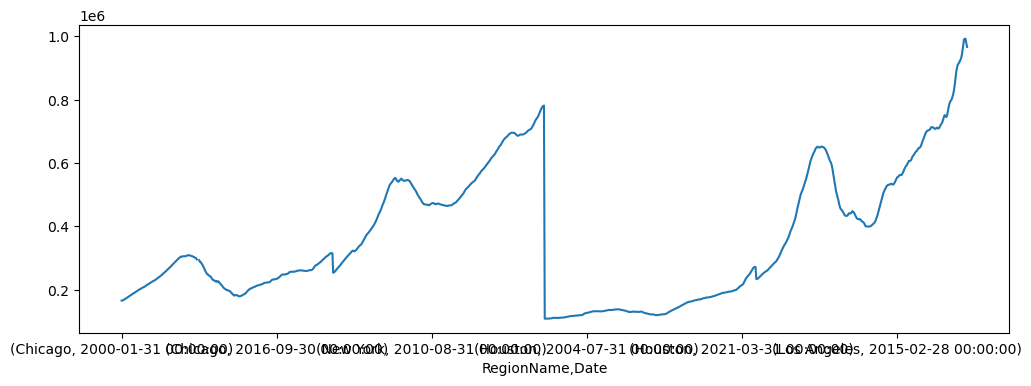

In [52]:
plot_df.plot(figsize=(12,4));

In [53]:
unstack = plot_df.unstack(level=0)
unstack

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,166139.0,109068.0,234181.0,253690.0
2000-02-29,166536.0,109079.0,234401.0,255517.0
2000-03-31,167368.0,108878.0,235513.0,257207.0
2000-04-30,168826.0,108881.0,237589.0,260310.0
2000-05-31,170499.0,108834.0,240113.0,263204.0
...,...,...,...,...
2022-05-31,312487.0,265558.0,990391.0,768797.0
2022-06-30,314663.0,268901.0,992337.0,773944.0
2022-07-31,315910.0,271059.0,992630.0,777692.0


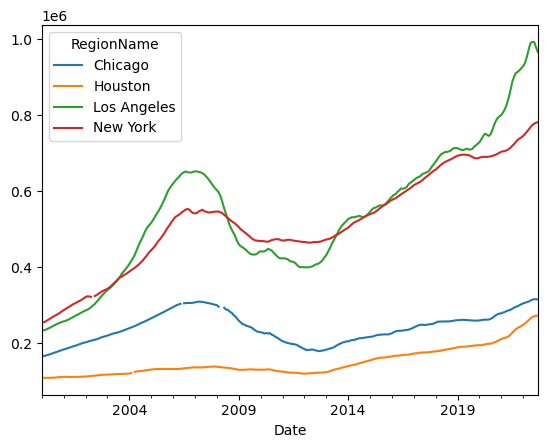

In [54]:
ax= unstack.plot();

1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

- Based on the figure above, we can see at the end of 2008 the city with the highest typical home value is Los Angeles. 

2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [65]:
months = unstack.loc["2008-01-31":"2009-01-31"]
months

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-01-31,300207.0,138208.0,603029.0,546538.0
2008-02-29,296063.0,137512.0,596635.0,546098.0
2008-03-31,NaN,136795.0,586065.0,544562.0
2008-04-30,NaN,136628.0,571226.0,541865.0
2008-05-31,293467.0,136228.0,554589.0,537685.0
2008-06-30,288495.0,135773.0,539622.0,533810.0
2008-07-31,288174.0,135392.0,524220.0,529211.0
2008-08-31,283199.0,134770.0,510520.0,525290.0
2008-09-30,280695.0,133932.0,500124.0,521347.0


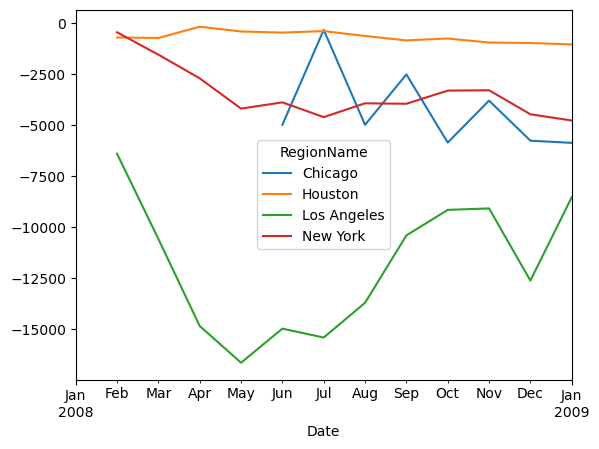

In [67]:
months.diff().plot();

Analyzing the model above the values of home values changed, this can be a loss in value due to what we can assume is a loss or drop in the housing market. Los Angeles took a harder hit than the other cities, Houston & New York stayed somewhat steady and did not take as much of a loss while Chicago is seems pretty with inconsistent dips. 